In [62]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rc('font', family='Malgun Gothic')

In [63]:
train = pd.read_csv('movies_train.csv')
test = pd.read_csv('movies_test.csv')

In [66]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [67]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,300529.00,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,342700.25,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4206610.67,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,691342.00,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,31738.00,1,380,1


In [68]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.00,270.00,600.00,600.00,600.00,600.00
mean,100.86,1050442.89,0.88,151.12,3.71,708181.75
std,18.10,1791408.30,1.18,165.65,2.45,1828005.85
min,45.00,1.00,0.00,0.00,0.00,1.00
25%,89.00,20380.00,0.00,17.00,2.00,1297.25
50%,100.00,478423.62,0.00,82.50,3.00,12591.00
75%,114.00,1286568.62,2.00,264.00,4.00,479886.75
max,180.00,17615314.00,5.00,869.00,25.00,14262766.00


In [69]:
train['distributor'].value_counts()[train['distributor'].value_counts()<10].index.tolist()

['인디플러그',
 'NEW',
 'KT&G 상상마당',
 '인벤트 디',
 '스폰지',
 '시네마서비스',
 'BoXoo 엔터테인먼트',
 '무비꼴라쥬',
 '(주)팝엔터테인먼트',
 '필라멘트 픽쳐스',
 '시네마 달',
 '리틀빅픽처스',
 'CGV아트하우스',
 '홀리가든',
 '씨너스엔터테인먼트(주)',
 '마노엔터테인먼트',
 '(주)엣나인필름',
 '메가박스(주)플러스엠',
 '나이너스엔터테인먼트(주)',
 '싸이더스',
 '(주) 영화제작전원사',
 '김기덕 필름',
 '이모션 픽처스',
 'CJ E&M 영화부문',
 '타임스토리그룹',
 '씨네그루(주)키다리이엔티',
 '이십세기폭스코리아(주)',
 '(주) 브릿지웍스',
 '마운틴 픽처스',
 '(주)마인스 엔터테인먼트',
 '드림팩트 엔터테인먼트',
 '트리필름',
 'KT',
 'CGV 아트하우스',
 '파이오니아21',
 '에스피엠',
 '리틀빅픽쳐스',
 '(주) 액티버스엔터테인먼트',
 'CJ E&M Pictures',
 '서울독립영화제',
 '백두대간',
 '(주)리틀빅픽처스',
 '조이앤시네마',
 '웃기씨네',
 '쇼박스(주)미디어플렉스',
 '(주)마인스엔터테인먼트',
 '드림로드',
 '화앤담이엔티',
 '노바엔터테인먼트',
 '(주)시네마달',
 '(주)스톰픽쳐스코리아',
 '(주)프레인글로벌',
 'SBS콘텐츠허브',
 '(주)예지림 엔터테인먼트',
 '인피니티엔터테인먼트',
 '콘텐츠판다',
 '씨네굿필름',
 '(주)고앤고 필름',
 '오퍼스픽쳐스',
 '팜코리아미디어',
 '(주)유비콘텐츠',
 '두 엔터테인먼트',
 '조이앤컨텐츠그룹',
 '나우콘텐츠',
 '보람엔터테인먼트',
 '한국YWCA연합회',
 '(주)온비즈넷',
 '싸이더스 FNH',
 'OAL(올)',
 '(주)아이필름코퍼레이션',
 '(주)피터팬픽쳐스',
 '제나두 엔터테인먼트',
 '와이드릴리즈(주)',
 '판다미디어',
 'tvN',
 '판씨네마(주)',
 '크리에이티브컴즈(주)',
 '(주)이스

In [70]:
etc_list = train['distributor'].value_counts()[train['distributor'].value_counts() <10].index.tolist()
train['distributor'].replace({x : '기타'for x in etc_list},inplace=True)

etc_list = test['distributor'].value_counts()[test['distributor'].value_counts() <10].index.tolist()
test['distributor'].replace({x : '기타'for x in etc_list},inplace=True)

In [71]:
train['distributor'].value_counts()

기타           294
CJ 엔터테인먼트     54
롯데엔터테인먼트      52
(주)NEW        30
(주)마운틴픽쳐스     29
인디스토리         26
(주)쇼박스        26
골든타이드픽처스      15
(주) 케이알씨지     14
시너지           10
시네마달          10
(주)키노아이       10
영화사 진진        10
어뮤즈           10
(주) 영화사조제     10
Name: distributor, dtype: int64

In [72]:
train['genre'].value_counts()

드라마       221
다큐멘터리      93
멜로/로맨스     78
코미디        53
공포         42
액션         28
느와르        27
애니메이션      21
미스터리       17
SF         13
뮤지컬         5
서스펜스        2
Name: genre, dtype: int64

In [73]:
etc_list = train['director'].value_counts()[train['director'].value_counts() <3].index.tolist()
train['director'].replace({x : '기타'for x in etc_list},inplace=True)
train['director'].value_counts()

etc_list = test['director'].value_counts()[test['director'].value_counts() <3].index.tolist()
test['director'].replace({x : '기타'for x in etc_list},inplace=True)
test['director'].value_counts()

기타     237
조성규      3
이정호      3
Name: director, dtype: int64

In [74]:
train['release_time'] = pd.to_datetime(train['release_time'])
train['year'] = train['release_time'].dt.year
train['month'] = train['release_time'].dt.month
train['weekday'] = train['release_time'].dt.weekday
train['day'] = train['release_time'].dt.day



test['release_time'] = pd.to_datetime(test['release_time'])
test['year'] = test['release_time'].dt.year
test['month'] = test['release_time'].dt.month
test['weekday'] = test['release_time'].dt.weekday
test['day'] = test['release_time'].dt.day


In [75]:
train[train['dir_prev_bfnum'].isnull()]['director'].value_counts()

기타        280
홍상수         6
노진수         4
전규환         4
장률          4
오멸          3
박철수         3
김조광수        3
신연식         3
정성복         3
김기덕         3
조성규         3
조조 히데오      3
김봉은         2
윤여창         2
장진          2
우민호         1
권칠인         1
Name: director, dtype: int64

In [76]:
temp_df =  train[train['dir_prev_bfnum'].isnull()]
temp_df[temp_df['director']=='홍상수'].sort_values(by='release_time')


,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month,weekday,day
19,하하하,기타,드라마,2010-05-05,115,청소년 관람불가,홍상수,NaN,0,74,9,57029,2010,5,2,5
523,옥희의 영화,기타,드라마,2010-09-16,80,청소년 관람불가,홍상수,NaN,0,57,3,37122,2010,9,3,16
115,북촌방향,(주) 영화사조제,드라마,2011-09-08,79,청소년 관람불가,홍상수,NaN,0,55,5,46212,2011,9,3,8
331,다른나라에서,기타,드라마,2012-05-31,89,청소년 관람불가,홍상수,NaN,0,70,2,31101,2012,5,3,31
506,우리 선희,기타,드라마,2013-09-12,89,청소년 관람불가,홍상수,NaN,0,8,6,69122,2013,9,3,12
15,자유의 언덕,기타,드라마,2014-09-04,67,청소년 관람불가,홍상수,NaN,0,52,3,39317,2014,9,3,4


In [77]:
# dic_list = train[train['dir_prev_bfnum'].isnull()]['director'].value_counts().index.tolist()

# for dic in dic_list:
#     if dic=='기타':
#         train.loc[(train['dir_prev_bfnum'].isnull()) & (train['director'] == dic),'dir_prev_bfnum'] = 0
#     else :
#         temp_df  = train[train['director']==dic].sort_values(by='release_time')
#         temp_idx = temp_df.index.tolist()
        
#         for i in range(len(temp_idx)):
#             if i==0:
#                 train.loc[temp_idx[i],'dir_prev_bfnum']=0
#             else :
#                 train.loc[temp_idx[i],'dir_prev_bfnum'] = train.loc[temp_idx[i-1],'box_off_num']
            

            
# dic_list = test[test['dir_prev_bfnum'].isnull()]['director'].value_counts().index.tolist()

# for dic in dic_list:
#     if dic=='기타':
#         test.loc[(test['dir_prev_bfnum'].isnull()) & (test['director'] == dic),'dir_prev_bfnum'] = 0
#     else :
#         temp_df  = test[test['director']==dic].sort_values(by='release_time')
#         temp_idx = temp_df.index.tolist()
        
#         for i in range(len(temp_idx)):
#             if i==0:
#                 test.loc[temp_idx[i],'dir_prev_bfnum']=0
#             else :
#                 test.loc[temp_idx[i],'dir_prev_bfnum'] = test.loc[temp_idx[i-1],'box_off_num']
            

        

In [78]:
train.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
year                0
month               0
weekday             0
day                 0
dtype: int64

In [79]:
train['dir_prev_num'].value_counts()

0    330
1    113
2     86
3     47
4     20
5      4
Name: dir_prev_num, dtype: int64

C:\Users\a\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='dir_prev_num', ylabel='box_off_num'>

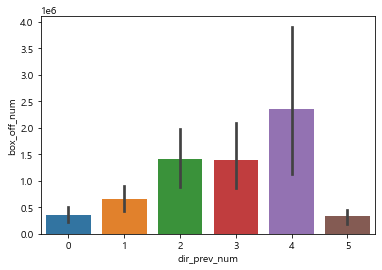

In [80]:
sns.barplot(train['dir_prev_num'],train['box_off_num'])

In [81]:
# train['dir_prev_num_cat'] = 0
# train.loc[(train['dir_prev_num'] ==2) | (train['dir_prev_num'] ==3),'dir_prev_num'] = 1
# train.loc[(train['dir_prev_num'] ==4) ,'dir_prev_num'] = 2

# test['dir_prev_num_cat'] = 0
# test.loc[(train['dir_prev_num'] ==2) | (test['dir_prev_num'] ==3),'dir_prev_num'] = 1
# test.loc[(train['dir_prev_num'] ==4) ,'dir_prev_num'] = 2

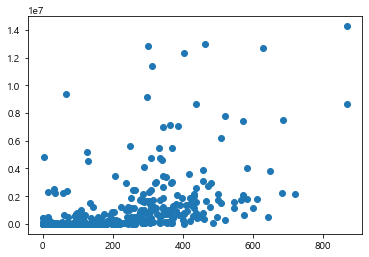

In [82]:
plt.scatter(train['num_staff'],train['box_off_num'])

In [83]:
# train['cat_staff'] = 0
# train.loc[train['num_staff']>=200,'cat_staff'] = 1

# test['cat_staff'] = 0
# test.loc[test['num_staff']>=200,'cat_staff'] = 1


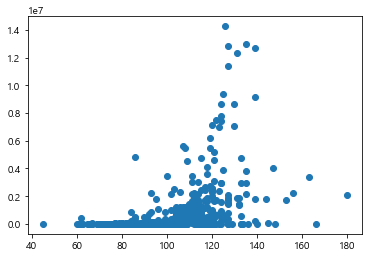

In [84]:
plt.scatter(train['time'],train['box_off_num'])

In [85]:
# train['time_cat'] = 0
# train.loc[train['time']>=100,'time_cat'] = 1
           
# test['time_cat'] = 0
# test.loc[test['time']>=100,'time_cat'] = 1

In [86]:
train['screening_rat'].value_counts()

청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: screening_rat, dtype: int64

C:\Users\a\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


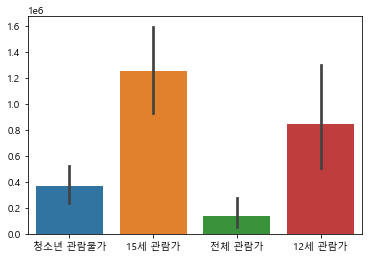

In [87]:
sns.barplot(train['screening_rat'].values,train['box_off_num'].values)
plt.show()

C:\Users\a\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='num_actor', ylabel='box_off_num'>

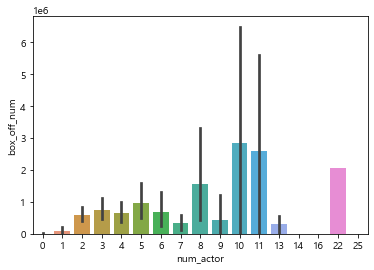

In [88]:
sns.barplot(train['num_actor'],train['box_off_num'])

In [89]:
# train['num_actor_cat'] = 0
# train.loc[train['num_actor']>7,'num_actor_cat'] = 1

# test['num_actor_cat'] = 0
# test.loc[test['num_actor']>7,'num_actor_cat'] = 1

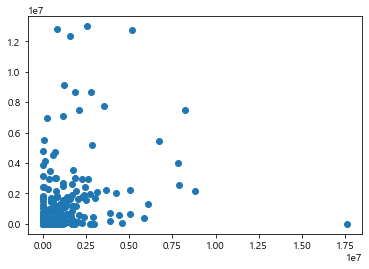

In [90]:
plt.scatter(train['dir_prev_bfnum'],train['box_off_num'])

In [91]:
train['dir_prev_bfnum'].describe()

count        270.00
mean     1050442.89
std      1791408.30
min            1.00
25%        20380.00
50%       478423.62
75%      1286568.62
max     17615314.00
Name: dir_prev_bfnum, dtype: float64

In [92]:
q1 = np.percentile(train['dir_prev_bfnum'],25)
q3 = np.percentile(train['dir_prev_bfnum'],75)
IQR = q3-q1
train.loc[train['dir_prev_bfnum']>q3+(2 * IQR),'dir_prev_bfnum'] = q1+ (2 * IQR)

q1 = np.percentile(test['dir_prev_bfnum'],25)
q3 = np.percentile(test['dir_prev_bfnum'],75)
IQR = q3-q1
test.loc[test['dir_prev_bfnum']>q3+(2 * IQR),'dir_prev_bfnum'] = q1+ (2 * IQR)

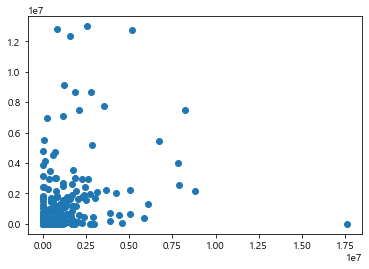

In [93]:
plt.scatter(train['dir_prev_bfnum'],train['box_off_num'])

In [94]:
train.columns

Index(['title', 'distributor', 'genre', 'release_time', 'time',
       'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num',
       'num_staff', 'num_actor', 'box_off_num', 'year', 'month', 'weekday',
       'day'],
      dtype='object')

In [95]:
ob_cols = ['distributor','genre','screening_rat','director','year','month','weekday','day']
scale_cols = ['num_staff','num_actor','time']
drop_cols = ['title','release_time','dir_prev_bfnum']

In [96]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

for col in ob_cols:
    encoder = LabelEncoder()
    train[col] = encoder.fit_transform(train[col])
    train[col] = train[col].astype('category')

for col in scale_cols:
    scaler = StandardScaler()
    train[col] = scaler.fit_transform(train[col].values.reshape(-1,1))
    
    
    
for col in ob_cols:
    encoder = LabelEncoder()
    test[col] = encoder.fit_transform(test[col])
    test[col] = test[col].astype('category')

for col in scale_cols:
    scaler = StandardScaler()
    test[col] = scaler.fit_transform(test[col].values.reshape(-1,1))

In [97]:
# from sklearn.model_selection import train_test_split

X = train.drop(drop_cols+['box_off_num'],axis=1,inplace=False)
test_ = test.drop(drop_cols,axis=1,inplace=False)
y = train['box_off_num']

# X_train, X_test, y_train, y_test = train_test_split(X,y)

In [103]:
from lightgbm import LGBMRegressor
from  sklearn.metrics import mean_squared_error

In [ ]:
clf = LGBMClassifier(objective='multiclass',
                             random_state=10,
                             max_depth=[1,3, 5, 7] 
                             learning_rate=[0,]  
                             silent=True, 
                             metric='multi_logloss',
                             n_jobs=-1, n_estimators=1000, 
                             class_weight='balanced',
                             colsample_bytree = params['colsample_bytree'], 
                             min_split_gain= params['min_split_gain'], 
                             bagging_freq = params['bagging_freq'],
                             min_child_weight=params['min_child_weight'],
                             num_leaves = params['num_leaves'], 
                             subsample = params['subsample'],
                             reg_alpha= params['reg_alpha'],
                             reg_lambda= params['reg_lambda'],
                             num_class=len(np.unique(y)),
                             bagging_seed=SEED,
                             seed=SEED,
                             boosting_type ='Dart'

In [122]:
from sklearn.model_selection import KFold 
Kfold = KFold(n_splits = 5)

total_score  =[]

for train_idx, test_idx in Kfold.split(X):
    X_train,X_test = X.loc[train_idx], X.loc[test_idx]
    y_train,y_test = y.loc[train_idx], y.loc[test_idx]
    
    lgb_reg = LGBMRegressor(n_estimators=1000,
                           max_depth = 10,
                           )
    lgb_reg.fit(X_train,y_train)
    pred = lgb_reg.predict(X_test)
    score = mean_squared_error(y_test,pred,squared = False)
    total_score.append(score)
    print('score : ',score)

print('mean_score : ',np.mean(total_score))

score :  1483948.3516046342
score :  1438732.1107737587
score :  1531297.6488158072
score :  2099608.4644021895
score :  2004493.7517421586
mean_score :  1711616.0654677097


In [111]:
score :  1196337.8744979778
score :  1221346.6866443376
score :  1431301.7660584804
score :  2015102.908144925
score :  1812502.7457378493
mean_score :  1535318.396216714

LGBMRegressor()

In [511]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from  sklearn.metrics import mean_squared_error

#squared

lr_reg = LinearRegression()
rnd_reg = RandomForestRegressor(n_estimators=300,max_depth=4)

lr_reg.fit(X_train,y_train)
rnd_reg.fit(X_train,y_train)

pred_lr = lr_reg.predict(X_test)
pred_rnd = rnd_reg.predict(X_test)

score_lr = mean_squared_error(y_test,pred_lr,squared = False)
score_rnd = mean_squared_error(y_test,pred_rnd,squared = False)

print('LinearRegression score : ',score_lr)
print('RandomForest score : ',score_rnd)

LinearRegression score :  1788237.612657904
RandomForest score :  1715950.3763866476


In [475]:
pd.DataFrame(rnd_reg.feature_importances_,X.columns).sort_values(by=0,ascending=False)

,0
num_staff,0.35
time,0.35
num_actor,0.06
distributor,0.05
day,0.04
genre,0.03
weekday,0.03
num_actor_cat,0.03
month,0.02
dir_prev_num,0.01


In [478]:
lr_reg = LinearRegression()
lr_reg.fit(X,y)
pred= lr_reg.predict(test_)
submission = pd.read_csv('submission.csv')
submission['box_off_num'] = pred
submission.to_csv('tq.csv',index=False)